In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime, time
import seaborn as sns

## Datos

In [5]:
df = pd.read_excel('./data/dieta-codorniz.xlsx')
df.shape

(319, 146)

In [6]:
df.sample(3)

,id,edad,sexo,estado,peso total,Oxalis,Quercus,Cyp.bulb,Phaseolus,Tephoria,...,covey,dist camino,ppanual17,tmedia17,altitud,lat,lon,hcrop,hland,gap
284,2015-10,J,Male,NM,0.3551,0.000,0.0000,0.0,0.3443,0.000,...,15.0,413.73,335.0,14.479167,1696.0,32.514533,-107.166584,1.532988,0.93306,Madrean Pinyon-Juniper Woodland
112,2016-228,J,Male,AZ,1.3657,0.000,0.0537,0.0,0.1050,0.134,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.893559,NaN,NaN
23,2016-245,NaN,NaN,AZ,2.0677,0.064,2.0037,0.0,0.0000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.138037,NaN,NaN


## Separacion de datos

In [7]:
columnas = df.columns.to_list()

var_name = columnas[:5] + columnas[-11:]
var_name.remove('gap')
vars_dieta_codorniz = columnas[5:-11]

In [8]:
df[var_name]

,id,edad,sexo,estado,peso total,time,covey,dist camino,ppanual17,tmedia17,altitud,lat,lon,hcrop,hland
0,2014-104,J,Female,NM,9.7584,1420.0,6.0,251.86,462.0,7.054167,2518.0,34.037969,-108.963777,0.000000,0.798600
1,2014-105,J,Male,NM,3.9632,1420.0,6.0,251.86,462.0,7.054167,2518.0,34.037969,-108.963777,0.000000,0.798600
2,2016-133,A,Female,AZ,5.4562,1700.0,10.0,574.06,515.0,15.954167,1527.0,31.375725,-110.530491,0.785803,1.245916
3,2014-28,J,Female,NM,4.4976,1610.0,8.0,23.07,385.0,10.979167,1952.0,33.176791,-107.735593,0.464732,0.764466
4,2016-132,J,Male,AZ,5.4630,1600.0,8.0,236.76,521.0,16.133333,1507.0,31.353053,-110.531060,1.680150,1.541562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,2015-59,A,Female,NM,0.3501,1300.0,12.0,86.99,315.0,14.458333,1543.0,32.590956,-107.920563,0.112925,1.628812
315,2015-6,J,Female,NM,0.1977,1230.0,3.0,127.25,324.0,11.175000,2023.0,33.688852,-107.330940,0.000000,1.796301
316,2015-60,J,Female,NM,2.6084,1300.0,12.0,86.99,315.0,14.458333,1543.0,32.590956,-107.920563,0.065394,1.628812
317,2015-61,A,Male,NM,7.3265,1430.0,8.0,763.38,332.0,14.225000,1560.0,32.592245,-107.930243,0.000000,0.761439


In [9]:
df[vars_dieta_codorniz].sample(3)

,Oxalis,Quercus,Cyp.bulb,Phaseolus,Tephoria,Caracoles,Insectos,Physalis,Vitis.arizonica,Lupinus,...,Bothriochloa.1,Euphorbia.2,SPA60,SPA61,SPA62,Phaseolus.1,SPA64,SPA65,Arachnida,Juniperus prob. deppeana
73,0.0,1.0677,0.0,0.0000,0.0000,0.0,0.0690,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
263,0.0,0.0000,0.0,1.2051,0.0899,0.0,0.1300,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38,0.0,3.5921,0.0,0.4864,0.0587,0.0,0.0651,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df[var_name].sample(3)

,id,edad,sexo,estado,peso total,time,covey,dist camino,ppanual17,tmedia17,altitud,lat,lon,hcrop,hland
93,2016-109,J,Male,AZ,1.6413,1000.0,NaN,108.04,528.0,15.475000,1578.0,31.488971,-110.611033,1.195383,1.391936
69,2016-124,A,Male,AZ,3.4511,1600.0,NaN,43.47,518.0,15.579167,1542.0,31.480749,-110.607803,1.201160,1.416779
169,2016-199,NaN,Male,AZ,3.2502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.607824,NaN


## Transformación

In [11]:
df['edad'].value_counts(dropna=False)

edad
J      165
NaN     87
A       67
Name: count, dtype: int64

In [12]:
# Variable: time
# Pasa el formato actual a tipo time con formato hh:mm:ss
def convertir_a_formato_de_24_horas(valor):
    if pd.isna(valor):
        return np.nan
    horas, minutos = divmod(int(valor), 100)
    return time(horas, minutos)

df['time'] = df['time'].apply(convertir_a_formato_de_24_horas)


In [13]:
df[var_name].sample(5)

,id,edad,sexo,estado,peso total,time,covey,dist camino,ppanual17,tmedia17,altitud,lat,lon,hcrop,hland
132,2016-110,J,Male,AZ,0.5567,10:00:00,NaN,108.04,528.0,15.475000,1578.0,31.488971,-110.611033,1.335932,1.391936
89,2016-213,NaN,Female,AZ,5.4660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.515808,NaN
225,2014-36,A,Male,NM,1.0033,14:30:00,10.0,99.93,374.0,11.112500,1947.0,33.207120,-107.723281,0.163658,0.272215
316,2015-60,J,Female,NM,2.6084,13:00:00,12.0,86.99,315.0,14.458333,1543.0,32.590956,-107.920563,0.065394,1.628812
256,2014-66,A,Male,NM,0.0000,09:40:00,4.0,19.25,386.0,11.908333,1869.0,32.872338,-107.683823,0.000000,1.057318


In [14]:
print('Estado: ',(df['estado'].unique()))
print('Sexo: ',(df['sexo'].unique()))

Estado:  ['NM' 'AZ' 'Az']
Sexo:  ['Female' 'Male' nan 'male' 'Male ']


In [15]:
df['estado'] = df['estado'].str.upper()
df['estado'].value_counts(dropna=False)

estado
AZ    177
NM    142
Name: count, dtype: int64

In [16]:
df['sexo'] = df['sexo'].apply(lambda x: x.strip().capitalize() if pd.notna(x) else x)
df['sexo'].value_counts(dropna=False)

sexo
Male      173
Female    104
NaN        42
Name: count, dtype: int64

In [17]:
df['dist camino'].isna().value_counts(dropna=False)

dist camino
False    221
True      98
Name: count, dtype: int64

### Valores vacios

In [18]:
# Encuentra las columnas con NaN
columnas_con_nan = df.columns[df.isna().any()].tolist()

# Calcula la cantidad de NaN por columna
nan_por_columna = df[columnas_con_nan].isna().sum()

# Crea el gráfico de barras
fig = px.bar(x=columnas_con_nan, y=nan_por_columna,
             labels={'x': 'Variables', 'y': 'Cantidad de NaN'},
             title='Cantidad de NaN por Columna')

# Rotar las etiquetas en el eje x a vertical
fig.update_xaxes(tickangle=90)

In [19]:
nan_por_columna

edad               87
sexo               42
Quercus             1
Cyp.bulb            2
Lotus.wrightii      1
Fabacea             1
SP34                1
SPA33               1
SPA55               2
Bothriochloa.1      1
time               87
covey             129
dist camino        98
ppanual17          98
tmedia17           98
altitud            98
lat                98
lon                98
hland              99
gap                98
dtype: int64

### GAP

In [20]:
frecuencia_gap = df['gap'].value_counts(dropna=False).sort_values(ascending=True)
frecuencia_gap = frecuencia_gap.reset_index()  
frecuencia_gap.columns = ['gap', 'Frecuencia'] 
frecuencia_gap['gap'] = frecuencia_gap['gap'].astype(str)
frecuencia_gap

,gap,Frecuencia
0,North American Warm Desert Bedrock Cliff and O...,1
1,Rocky Mountain Gambel Oak-Mixed Montane Shrubland,2
2,North American Warm Desert Wash,3
3,Chihuahuan Mixed Salt Desert Scrub,3
4,Southern Rocky Mountain Pinyon-Juniper Woodland,5
5,"Chihuahuan Creosotebush, Mixed Desert and Thor...",7
6,Mogollon Chaparral,7
7,Madrean Juniper Savanna,8
8,Rocky Mountain Ponderosa Pine Woodland,12
9,Apacherian-Chihuahuan Mesquite Upland Scrub,18


In [21]:
fig = px.bar(frecuencia_gap, x='Frecuencia', y='gap', orientation='h',
             labels={'gap': 'Ubicación', 'Frecuencia': 'Frecuencia'},
             title='Frecuencia de gap')

fig.show()

Se decidió omitir la variable gap ya que no la consideramos de relevancia para el análisis.

In [22]:
df.drop(columns=['gap'], inplace=True)

In [23]:
df.head()

,id,edad,sexo,estado,peso total,Oxalis,Quercus,Cyp.bulb,Phaseolus,Tephoria,...,time,covey,dist camino,ppanual17,tmedia17,altitud,lat,lon,hcrop,hland
0,2014-104,J,Female,NM,9.7584,9.7584,0.0,0.000,0.0000,0.0000,...,14:20:00,6.0,251.86,462.0,7.054167,2518.0,34.037969,-108.963777,0.000000,0.798600
1,2014-105,J,Male,NM,3.9632,3.9632,0.0,0.000,0.0000,0.0000,...,14:20:00,6.0,251.86,462.0,7.054167,2518.0,34.037969,-108.963777,0.000000,0.798600
2,2016-133,A,Female,AZ,5.4562,3.8238,0.0,0.000,0.6148,0.0726,...,17:00:00,10.0,574.06,515.0,15.954167,1527.0,31.375725,-110.530491,0.785803,1.245916
3,2014-28,J,Female,NM,4.4976,3.7076,0.0,0.000,0.0000,0.0000,...,16:10:00,8.0,23.07,385.0,10.979167,1952.0,33.176791,-107.735593,0.464732,0.764466
4,2016-132,J,Male,AZ,5.4630,2.2011,0.0,0.778,0.3908,0.0000,...,16:00:00,8.0,236.76,521.0,16.133333,1507.0,31.353053,-110.531060,1.680150,1.541562


In [24]:
df[var_name].describe()

,peso total,covey,dist camino,ppanual17,tmedia17,altitud,lat,lon,hcrop,hland
count,319.000000,190.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,319.000000,220.000000
mean,2.084231,9.178947,207.466742,436.755656,13.860351,1709.475113,32.221751,-108.935298,0.645314,1.044265
std,1.718818,3.779586,178.331358,78.965781,2.093009,224.818989,0.815692,1.534481,0.528932,0.360545
min,0.000000,1.000000,6.400000,235.000000,7.054167,1206.000000,31.343850,-111.072099,0.000000,0.222691
25%,0.704350,6.000000,81.820000,376.000000,12.379167,1567.000000,31.479233,-110.585248,0.181204,0.783493
50%,1.776000,10.000000,171.920000,422.000000,14.354167,1658.000000,31.791366,-108.940734,0.579030,1.057318
75%,3.001150,12.000000,272.860000,518.000000,15.537500,1901.000000,32.894714,-107.723281,0.963353,1.362937
max,9.758400,20.000000,774.840000,620.000000,17.312500,2518.000000,34.037969,-105.354701,2.318525,1.796301


In [25]:
df[var_name]

,id,edad,sexo,estado,peso total,time,covey,dist camino,ppanual17,tmedia17,altitud,lat,lon,hcrop,hland
0,2014-104,J,Female,NM,9.7584,14:20:00,6.0,251.86,462.0,7.054167,2518.0,34.037969,-108.963777,0.000000,0.798600
1,2014-105,J,Male,NM,3.9632,14:20:00,6.0,251.86,462.0,7.054167,2518.0,34.037969,-108.963777,0.000000,0.798600
2,2016-133,A,Female,AZ,5.4562,17:00:00,10.0,574.06,515.0,15.954167,1527.0,31.375725,-110.530491,0.785803,1.245916
3,2014-28,J,Female,NM,4.4976,16:10:00,8.0,23.07,385.0,10.979167,1952.0,33.176791,-107.735593,0.464732,0.764466
4,2016-132,J,Male,AZ,5.4630,16:00:00,8.0,236.76,521.0,16.133333,1507.0,31.353053,-110.531060,1.680150,1.541562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,2015-59,A,Female,NM,0.3501,13:00:00,12.0,86.99,315.0,14.458333,1543.0,32.590956,-107.920563,0.112925,1.628812
315,2015-6,J,Female,NM,0.1977,12:30:00,3.0,127.25,324.0,11.175000,2023.0,33.688852,-107.330940,0.000000,1.796301
316,2015-60,J,Female,NM,2.6084,13:00:00,12.0,86.99,315.0,14.458333,1543.0,32.590956,-107.920563,0.065394,1.628812
317,2015-61,A,Male,NM,7.3265,14:30:00,8.0,763.38,332.0,14.225000,1560.0,32.592245,-107.930243,0.000000,0.761439


In [26]:
df['edad'].fillna('Desconocido', inplace=True)
columnas_con_nan = df.columns[df.isna().any()].tolist()
nan_por_columna = df[columnas_con_nan].isna().sum()

fig = px.bar(x=columnas_con_nan, y=nan_por_columna[columnas_con_nan],
             labels={'x': 'Variables', 'y': 'Cantidad de NaN'},
             title='Cantidad de NaN por Columna')

# Rotar las etiquetas en el eje x a vertical
fig.update_xaxes(tickangle=90)

# Mostrar el gráfico
fig.show()


## Dieta de codornices

In [27]:
df_dieta = df[vars_dieta_codorniz]

In [28]:
df_dieta

,Oxalis,Quercus,Cyp.bulb,Phaseolus,Tephoria,Caracoles,Insectos,Physalis,Vitis.arizonica,Lupinus,...,Bothriochloa.1,Euphorbia.2,SPA60,SPA61,SPA62,Phaseolus.1,SPA64,SPA65,Arachnida,Juniperus prob. deppeana
0,9.7584,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.9632,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.8238,0.0,0.0000,0.6148,0.0726,0.0,0.0514,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.7076,0.0,0.0000,0.0000,0.0000,0.0,0.7900,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.2011,0.0,0.7780,0.3908,0.0000,0.0,0.0027,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,0.0000,0.0,0.3501,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
315,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0339,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
316,0.0000,0.0,2.5800,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
317,0.0000,0.0,0.0000,7.3265,0.0000,0.0,0.0000,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Basándonos en el análisis propuesto en la tesis, se decidió agrupar las variables de especies de comida con menores proporciones en la dieta de las codornices, creando una columna llamada "otros"

In [29]:
# Agrupamos las especies
df_grouped = pd.DataFrame()
df_grouped['Euphorbia'] = df['Euphorbia']+df['Euphorbia.1']+df['Euphorbia.2'] #+df['Euphorbia.exstipulata']+df['Euphorbia probably E. bilobata']
df_grouped['Phaseolus'] = df['Phaseolus'] + df['Phaseolus.1']
df_grouped['Setaria'] = df['Setaria'] + df['Setaria.1'] #+ df['Setaria nigricans']
df_grouped[['Cyperus.fendlerianus','Quercus','Cyp.bulb', 'Oxalis', 'Insectos', 'Paspalum.distichum', 'Physalis']] = df[['Cyperus.fendlerianus', 'Quercus', 'Cyp.bulb', 'Oxalis', 'Insectos', 'Paspalum.distichum', 'Physalis']]

# Definir una lista de columnas a evitar
columnas_evitar = ['Euphorbia', 'Euphorbia.1', 'Euphorbia.2', 'Phaseolus', 'Phaseolus.1', 'Setaria', 'Setaria.1', 'Cyperus.fendlerianus','Quercus','Cyp.bulb', 'Oxalis', 'Insectos', 'Paspalum.distichum', 'Physalis']

# Crear una lista de columnas agrupadas, excluyendo las columnas a evitar
lista_columnas_agrupadas = [elemento for elemento in vars_dieta_codorniz if elemento not in columnas_evitar]
# Calcular la suma de las columnas seleccionadas en 'lista_columnas_agrupadas' del DataFrame original 'df' y asignarla a la columna 'Otros' en 'df_grouped'
df_grouped['Otros'] = df[lista_columnas_agrupadas].sum(axis=1)

# Asignar las columnas de 'var_name' del DataFrame original 'df' al DataFrame 'df_grouped'
df_grouped[var_name] = df[var_name]
# Eliminar la columna 'time' del DataFrame 'df_grouped'
df_grouped = df_grouped.drop(columns=['time'])

df_grouped

,Euphorbia,Phaseolus,Setaria,Cyperus.fendlerianus,Quercus,Cyp.bulb,Oxalis,Insectos,Paspalum.distichum,Physalis,...,peso total,covey,dist camino,ppanual17,tmedia17,altitud,lat,lon,hcrop,hland
0,0.0,0.0000,0.0,0.0000,0.0,0.0000,9.7584,0.0000,0.0000,0.0000,...,9.7584,6.0,251.86,462.0,7.054167,2518.0,34.037969,-108.963777,0.000000,0.798600
1,0.0,0.0000,0.0,0.0000,0.0,0.0000,3.9632,0.0000,0.0000,0.0000,...,3.9632,6.0,251.86,462.0,7.054167,2518.0,34.037969,-108.963777,0.000000,0.798600
2,0.0,0.6148,0.0,0.0000,0.0,0.0000,3.8238,0.0514,0.0000,0.0000,...,5.4562,10.0,574.06,515.0,15.954167,1527.0,31.375725,-110.530491,0.785803,1.245916
3,0.0,0.0000,0.0,0.0000,0.0,0.0000,3.7076,0.7900,0.0000,0.0000,...,4.4976,8.0,23.07,385.0,10.979167,1952.0,33.176791,-107.735593,0.464732,0.764466
4,0.0,0.3908,0.0,0.0000,0.0,0.7780,2.2011,0.0027,0.0024,0.0000,...,5.4630,8.0,236.76,521.0,16.133333,1507.0,31.353053,-110.531060,1.680150,1.541562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,0.0,0.0000,0.0,0.0000,0.0,0.3501,0.0000,0.0000,0.0000,0.0000,...,0.3501,12.0,86.99,315.0,14.458333,1543.0,32.590956,-107.920563,0.112925,1.628812
315,0.0,0.0000,0.0,0.0053,0.0,0.0000,0.0000,0.0000,0.0000,0.0339,...,0.1977,3.0,127.25,324.0,11.175000,2023.0,33.688852,-107.330940,0.000000,1.796301
316,0.0,0.0000,0.0,0.0000,0.0,2.5800,0.0000,0.0000,0.0000,0.0000,...,2.6084,12.0,86.99,315.0,14.458333,1543.0,32.590956,-107.920563,0.065394,1.628812
317,0.0,7.3265,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,...,7.3265,8.0,763.38,332.0,14.225000,1560.0,32.592245,-107.930243,0.000000,0.761439


In [30]:
df_grouped.describe()

,Euphorbia,Phaseolus,Setaria,Cyperus.fendlerianus,Quercus,Cyp.bulb,Oxalis,Insectos,Paspalum.distichum,Physalis,...,peso total,covey,dist camino,ppanual17,tmedia17,altitud,lat,lon,hcrop,hland
count,319.000000,319.000000,319.000000,319.000000,318.000000,317.000000,319.000000,319.000000,319.000000,319.000000,...,319.000000,190.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,319.000000,220.000000
mean,0.002866,0.319438,0.024885,0.019694,0.391575,0.194748,0.097181,0.113014,0.069161,0.035234,...,2.084231,9.178947,207.466742,436.755656,13.860351,1709.475113,32.221751,-108.935298,0.645314,1.044265
std,0.018548,1.021767,0.196809,0.075140,0.873040,0.626539,0.681455,0.384408,0.456589,0.303878,...,1.718818,3.779586,178.331358,78.965781,2.093009,224.818989,0.815692,1.534481,0.528932,0.360545
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,6.400000,235.000000,7.054167,1206.000000,31.343850,-111.072099,0.000000,0.222691
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.704350,6.000000,81.820000,376.000000,12.379167,1567.000000,31.479233,-110.585248,0.181204,0.783493
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.776000,10.000000,171.920000,422.000000,14.354167,1658.000000,31.791366,-108.940734,0.579030,1.057318
75%,0.000000,0.091750,0.000000,0.000550,0.134650,0.000000,0.000000,0.030000,0.000000,0.000000,...,3.001150,12.000000,272.860000,518.000000,15.537500,1901.000000,32.894714,-107.723281,0.963353,1.362937
max,0.192700,7.326500,2.553300,0.656100,4.382100,6.723300,9.758400,2.900000,4.769700,4.471900,...,9.758400,20.000000,774.840000,620.000000,17.312500,2518.000000,34.037969,-105.354701,2.318525,1.796301


In [31]:
corr_matrix = df_grouped.select_dtypes(include='number').corr()

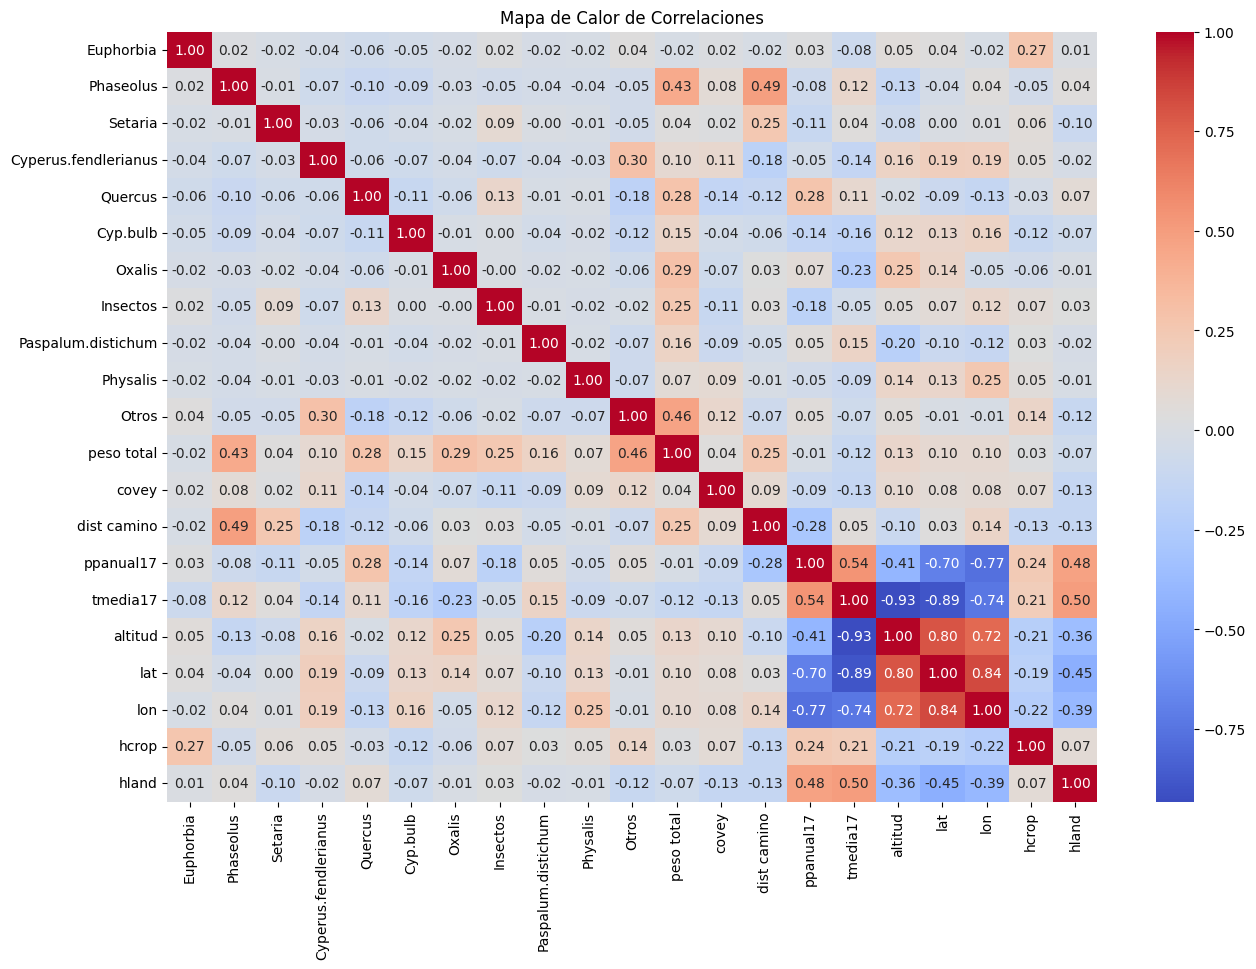

In [32]:
# Crear el mapa de calor de correlaciones
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlaciones')
plt.show()

In [35]:
df_grouped.columns

Index(['Euphorbia', 'Phaseolus', 'Setaria', 'Cyperus.fendlerianus', 'Quercus',
       'Cyp.bulb', 'Oxalis', 'Insectos', 'Paspalum.distichum', 'Physalis',
       'Otros', 'id', 'edad', 'sexo', 'estado', 'peso total', 'covey',
       'dist camino', 'ppanual17', 'tmedia17', 'altitud', 'lat', 'lon',
       'hcrop', 'hland'],
      dtype='object')

In [40]:
interesting_col = ['Euphorbia', 'Phaseolus', 'Setaria', 'Cyperus.fendlerianus', 'Quercus',
       'Cyp.bulb', 'Oxalis', 'Insectos', 'Paspalum.distichum', 'Physalis',
       'Otros', 'peso total', 'covey', 'ppanual17', 'tmedia17', 'altitud', 'hcrop', 'hland']

interesting_col_MH = ['Euphorbia', 'Phaseolus', 'Setaria', 'Cyperus.fendlerianus', 'Quercus',
       'Cyp.bulb', 'Oxalis', 'Insectos', 'Paspalum.distichum', 'Physalis',
       'Otros', 'peso total', 'covey']


In [45]:
df_grouped_state = df_grouped.groupby('estado')[interesting_col].agg(['mean', 'std'])

In [49]:
df_grouped_state.melt

<bound method DataFrame.melt of        Euphorbia           Phaseolus             Setaria            \
            mean       std      mean       std      mean       std   
estado                                                               
AZ      0.004318  0.022340  0.273298  0.576602  0.011915  0.080106   
NM      0.001056  0.012123  0.376950  1.390528  0.041051  0.280843   

       Cyperus.fendlerianus             Quercus            ...   ppanual17  \
                       mean       std      mean       std  ...        mean   
estado                                                     ...               
AZ                 0.012285  0.051619  0.647041  1.055530  ...  523.647059   
NM                 0.028930  0.096192  0.074942  0.385182  ...  382.448529   

                    tmedia17                altitud                 hcrop  \
              std       mean       std         mean         std      mean   
estado                                                                  

In [41]:
for column in interesting_col:
    df = px.data.tips()
    fig = px.box(df_grouped, x="estado", y=column, width=600, height=600)
    fig.show()

In [50]:
df_grouped_MH = df_grouped.groupby('sexo')[interesting_col_MH].agg(['mean', 'std'])
df_grouped_MH.melt

<bound method DataFrame.melt of        Euphorbia           Phaseolus             Setaria            \
            mean       std      mean       std      mean       std   
sexo                                                                 
Female  0.002677  0.018301  0.205445  0.743073  0.038136  0.223220   
Male    0.000000  0.000000  0.417166  1.246287  0.022726  0.203751   

       Cyperus.fendlerianus             Quercus            ...  \
                       mean       std      mean       std  ...   
sexo                                                       ...   
Female             0.013712  0.055137  0.231530  0.686263  ...   
Male               0.025853  0.090706  0.399901  0.910466  ...   

       Paspalum.distichum            Physalis               Otros            \
                     mean       std      mean       std      mean       std   
sexo                                                                          
Female           0.079054  0.501978  0.008935  0.

In [42]:
for column in interesting_col_MH:
    df = px.data.tips()
    fig = px.box(df_grouped, x="estado", y=column, color = 'sexo', width=600, height=600)
    fig.show()

In [51]:
for column in interesting_col_MH:
    df = px.data.tips()
    fig = px.box(df_grouped, x="sexo", y=column, width=600, height=600)
    fig.show()

## Análisis de peso

In [5]:
from sklearn.neighbors import KernelDensity
import pandas as pd
import numpy as np
import plotly.express as px

In [6]:
df = pd.read_excel('./DFpesototal.xlsx')
df.head()

,Unnamed: 0,Estado,Edad,Sexo,Hora,PesoTotal
0,1,AZ,J,Male,<=13:00,0.5726
1,2,AZ,J,Male,<=13:00,0.2770
2,3,AZ,J,Male,<=13:00,0.6935
3,4,AZ,J,Male,<=13:00,2.0724
4,5,AZ,J,Male,<=13:00,0.6617


In [7]:
fig = px.box(df, x="Estado", y='PesoTotal',width=600, height=600)
fig.show()

In [66]:
fig = px.histogram(df, x="PesoTotal", width=600, height= 500, color = 'Estado', nbins = 12)
fig.show()

In [93]:
df.shape

(104, 6)

In [102]:
fig = px.histogram(df, x="PesoTotal", width=600, height= 500, color = 'Hora', nbins = 8)
fig.show()

In [29]:
fig = px.box(df, x="Hora", y='PesoTotal',width=600, height=600)
fig.show()

In [27]:
fig = px.box(df, x="Estado", y='PesoTotal', color = 'Hora', width=600, height=600)
fig.show()

In [138]:
df_AZ = df[df['Estado'] == 'AZ']
df_NM = df[df['Estado'] == 'NM']

In [41]:
horas = ['<=13:00', '>13:00']

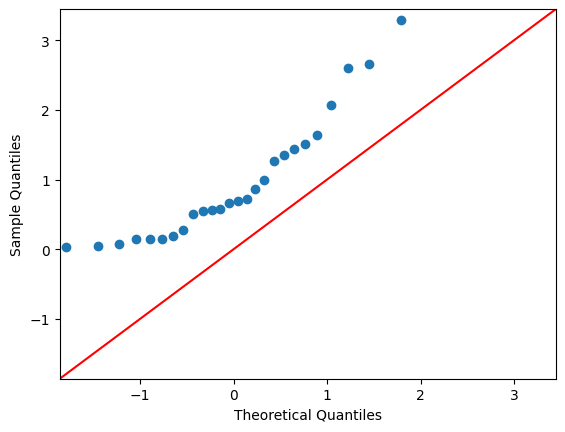

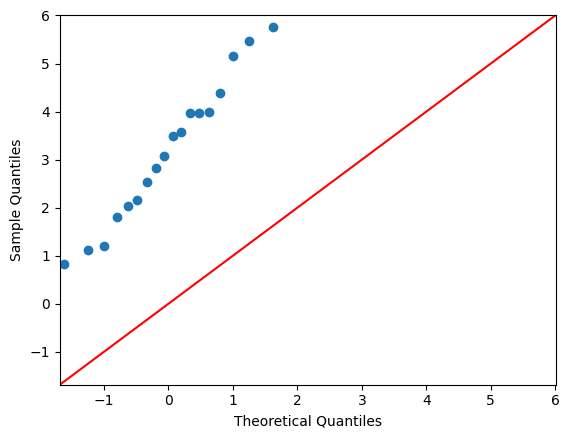

In [87]:
for hora in horas:
    sm.qqplot(df_AZ[df_AZ['Hora'] == hora]['PesoTotal'], line = '45')
    py.show()

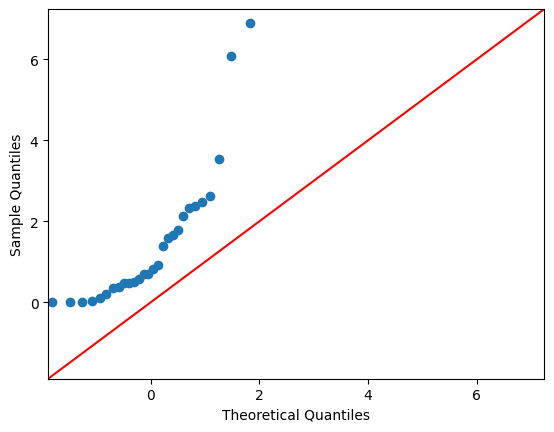

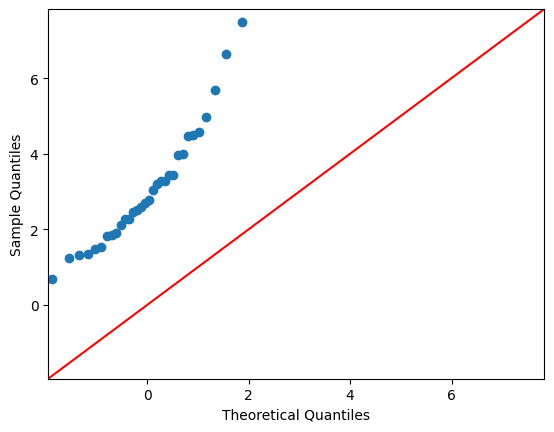

In [45]:
for hora in horas:
    sm.qqplot(df_NM[df_NM['Hora'] == hora]['PesoTotal'], line = '45')
    py.show()

In [ ]:
fig = px.histogram(df, x="total_bill")
fig.show()

In [68]:
import scipy

In [71]:
scipy.stats.shapiro(df['PesoTotal'])

ShapiroResult(statistic=0.9214711785316467, pvalue=1.1760513189074118e-05)

In [72]:
scipy.stats.shapiro(df_AZ['PesoTotal'])

ShapiroResult(statistic=0.9045107364654541, pvalue=0.0015018753474578261)

In [82]:
for hora in horas:
    print(f'p-valor de prueba Shapiro-Wilk (General) (hora : {hora}): {scipy.stats.shapiro(df[df['Hora'] == hora]['PesoTotal'])[1]}')

p-valor de prueba Shapiro-Wilk (General) (hora : <=13:00): 7.092359055604902e-08
p-valor de prueba Shapiro-Wilk (General) (hora : >13:00): 0.10127239674329758


In [77]:
for hora in horas:
    print(f'p-valor de prueba Shapiro-Wilk en NM (hora : {hora}): {scipy.stats.shapiro(df_NM[df_NM['Hora'] == hora]['PesoTotal'])[1]}')

p-valor de prueba Shapiro-Wilk en NM (hora : <=13:00): 3.623225347837433e-05
p-valor de prueba Shapiro-Wilk en NM (hora : >13:00): 0.049600303173065186


In [79]:
for hora in horas:
    print(f'p-valor de prueba Shapiro-Wilk en AZ (hora : {hora}): {scipy.stats.shapiro(df_AZ[df_AZ['Hora'] == hora]['PesoTotal'])[1]}')

p-valor de prueba Shapiro-Wilk en AZ (hora : <=13:00): 0.004211511928588152
p-valor de prueba Shapiro-Wilk en AZ (hora : >13:00): 0.7140266299247742


<Axes: >

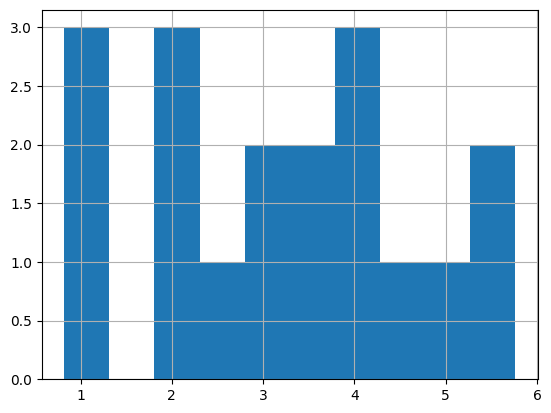

In [85]:
df_AZ[df_AZ['Hora'] == '>13:00']['PesoTotal']

In [16]:
np.array(df['PesoTotal'])

array([0.5726 , 0.277  , 0.6935 , 2.0724 , 0.6617 , 0.5128 , 1.4358 ,
       2.5986 , 0.7155 , 1.6413 , 0.1467 , 0.027  , 0.0705 , 1.2642 ,
       0.1923 , 0.5567 , 2.6547 , 1.5096 , 3.2824 , 0.1466 , 1.348  ,
       0.5417 , 0.149  , 0.0534 , 0.8579 , 0.9873 , 5.463  , 3.4975 ,
       3.0839 , 1.1292 , 4.3793 , 3.57851, 5.1593 , 3.9955 , 2.1698 ,
       1.815  , 1.2086 , 5.76069, 3.9676 , 3.9705 , 2.5376 , 2.8309 ,
       2.0328 , 0.8214 , 2.47819, 0.50259, 1.7874 , 1.66329, 2.6223 ,
       0.     , 0.0931 , 0.4628 , 0.4701 , 0.2014 , 0.     , 0.7054 ,
       0.8293 , 0.3853 , 0.58439, 1.3913 , 1.5907 , 2.3225 , 0.3551 ,
       2.3693 , 6.9003 , 6.0859 , 3.5445 , 0.0092 , 0.7094 , 0.0409 ,
       0.9168 , 2.1258 , 3.9632 , 4.5002 , 2.4675 , 3.0461 , 1.48979,
       2.1203 , 1.8369 , 2.69   , 0.6988 , 1.2356 , 5.6758 , 1.33299,
       2.5207 , 1.85459, 4.5783 , 3.44129, 4.97309, 3.2908 , 2.2666 ,
       2.60119, 3.98529, 2.27289, 4.4719 , 1.3487 , 1.5321 , 3.1919 ,
       3.4345 , 3.27

In [17]:
np.array(df['PesoTotal']).reshape(-1,1)

array([[0.5726 ],
       [0.277  ],
       [0.6935 ],
       [2.0724 ],
       [0.6617 ],
       [0.5128 ],
       [1.4358 ],
       [2.5986 ],
       [0.7155 ],
       [1.6413 ],
       [0.1467 ],
       [0.027  ],
       [0.0705 ],
       [1.2642 ],
       [0.1923 ],
       [0.5567 ],
       [2.6547 ],
       [1.5096 ],
       [3.2824 ],
       [0.1466 ],
       [1.348  ],
       [0.5417 ],
       [0.149  ],
       [0.0534 ],
       [0.8579 ],
       [0.9873 ],
       [5.463  ],
       [3.4975 ],
       [3.0839 ],
       [1.1292 ],
       [4.3793 ],
       [3.57851],
       [5.1593 ],
       [3.9955 ],
       [2.1698 ],
       [1.815  ],
       [1.2086 ],
       [5.76069],
       [3.9676 ],
       [3.9705 ],
       [2.5376 ],
       [2.8309 ],
       [2.0328 ],
       [0.8214 ],
       [2.47819],
       [0.50259],
       [1.7874 ],
       [1.66329],
       [2.6223 ],
       [0.     ],
       [0.0931 ],
       [0.4628 ],
       [0.4701 ],
       [0.2014 ],
       [0.     ],
       [0.

In [146]:
def PlotKernelDensity(data, selected_kernel, width):
    X = np.sort(np.array(data)).reshape(-1,1)
    kde = KernelDensity(kernel=selected_kernel, bandwidth=width).fit(X)
    log_dens = kde.score_samples(X)

    x = np.zeros(X.shape[0])
    y = np.exp(log_dens)
    plt.plot(X, y, c='blue')
    plt.title(f'Gráfica de densidad con kernel {selected_kernel} y ancho {width}')
    plt.show()

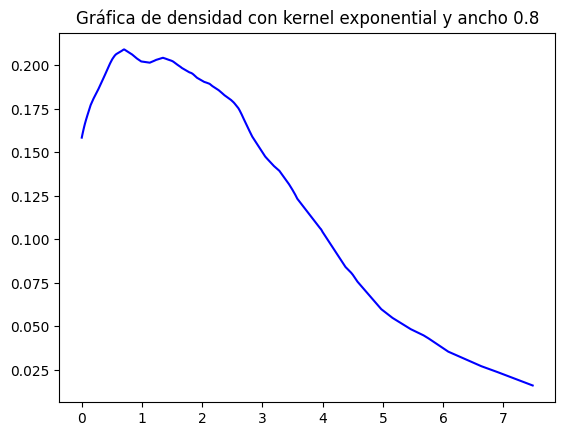

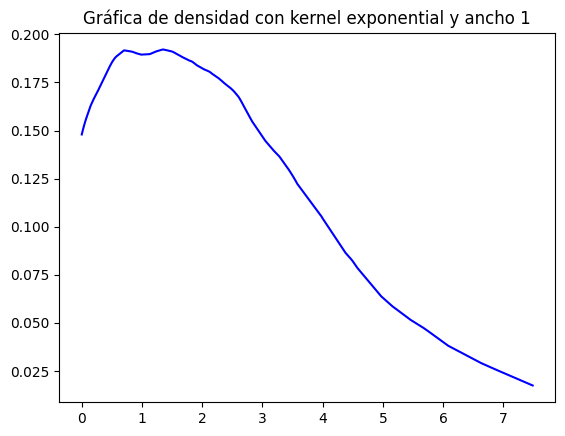

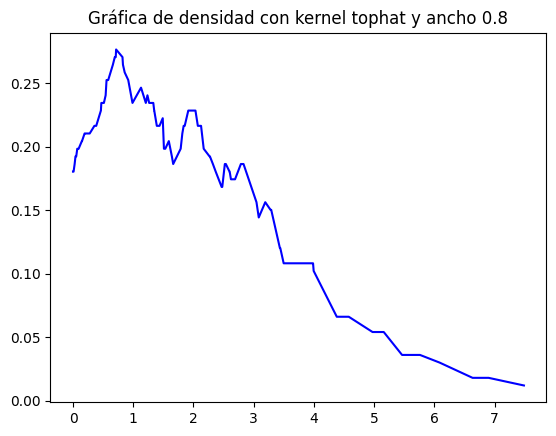

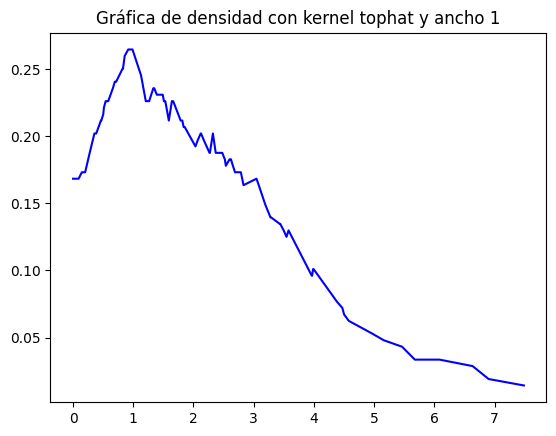

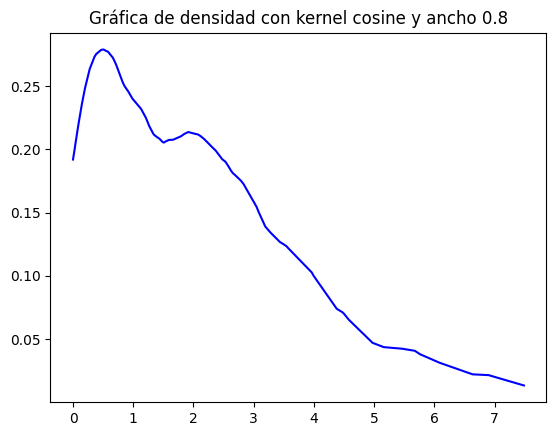

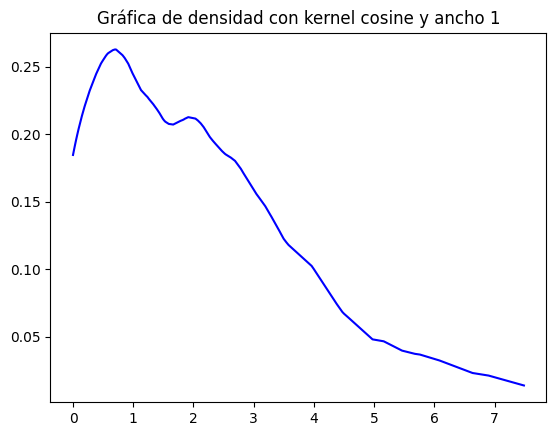

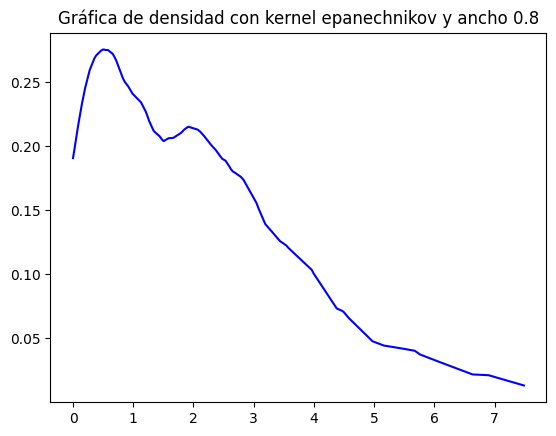

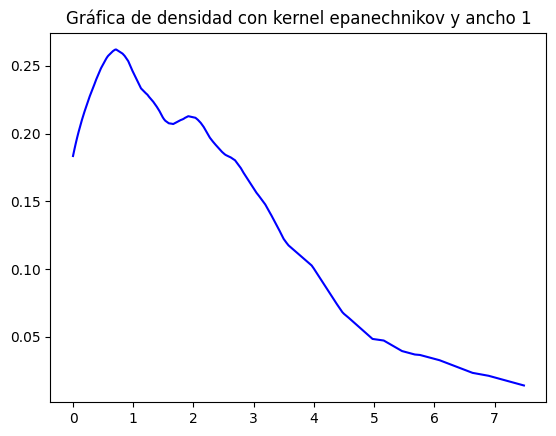

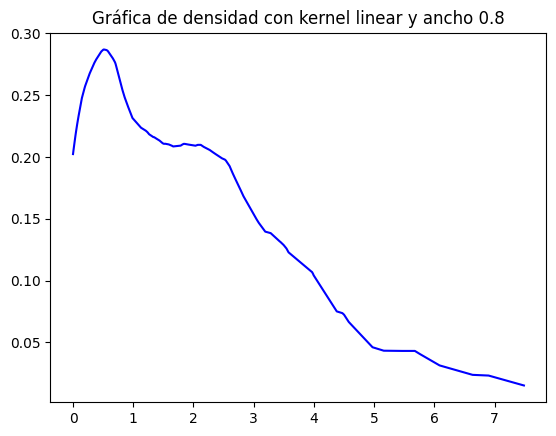

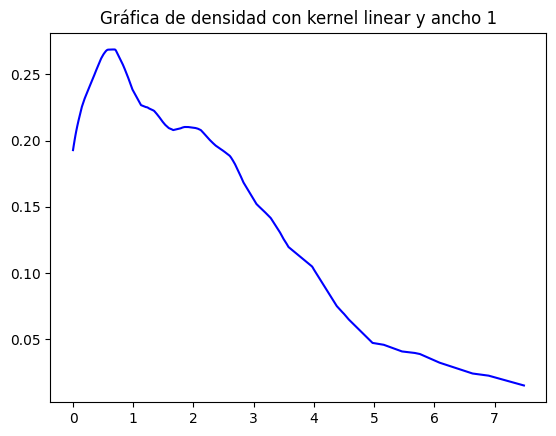

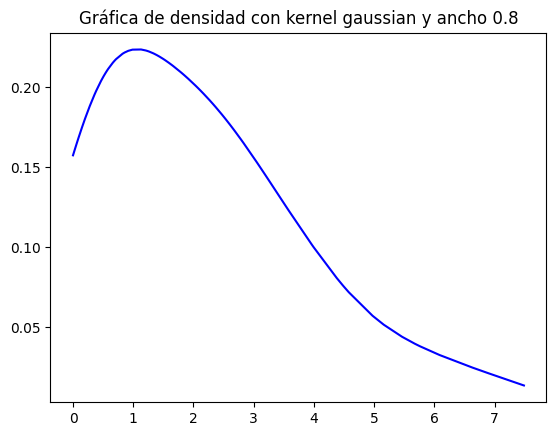

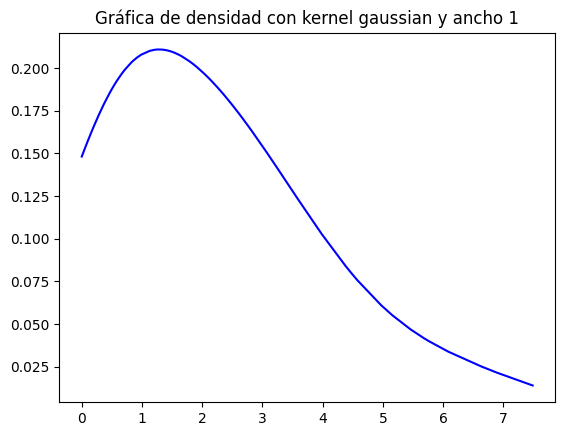

In [150]:
for kernel in ['exponential', 'tophat', 'cosine', 'epanechnikov', 'linear', 'gaussian']:
    for ancho in [0.8,1]:
        PlotKernelDensity(df['PesoTotal'], kernel, ancho)

In [151]:
df['Hora']

0      <=13:00
1      <=13:00
2      <=13:00
3      <=13:00
4      <=13:00
        ...   
99      >13:00
100     >13:00
101     >13:00
102     >13:00
103     >13:00
Name: Hora, Length: 104, dtype: object

Hora: <=13:00


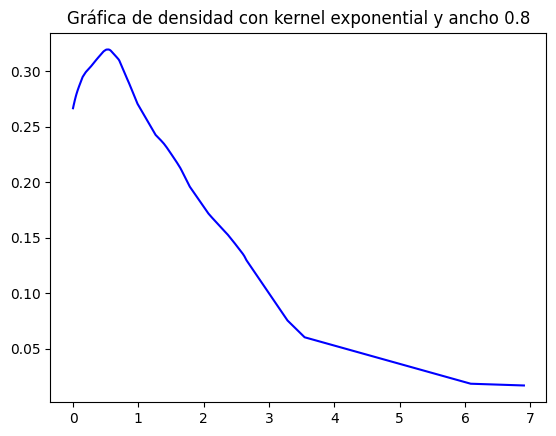

Hora: >13:00


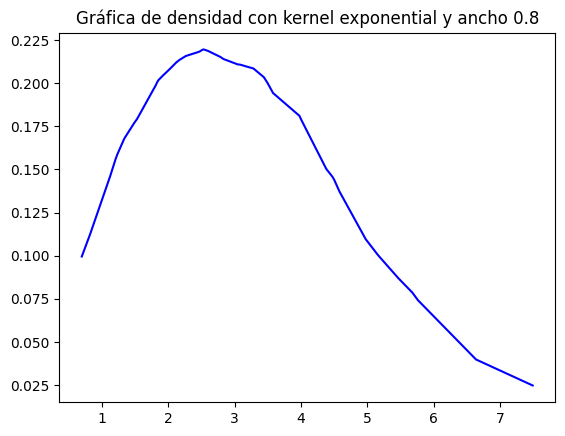

Hora: <=13:00


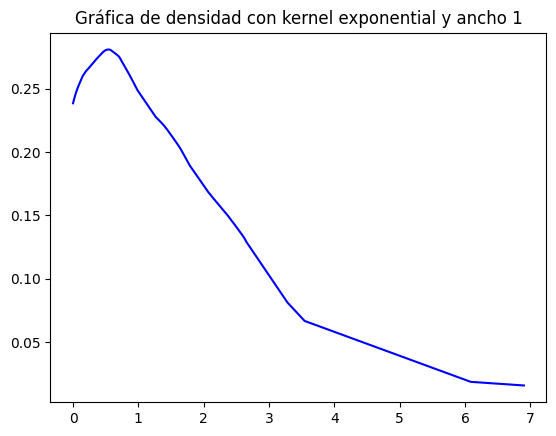

Hora: >13:00


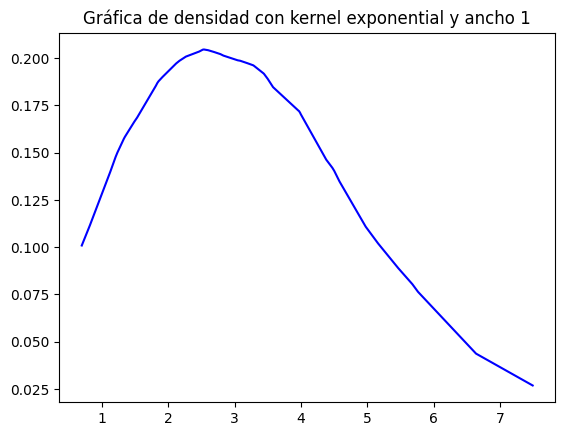

Hora: <=13:00


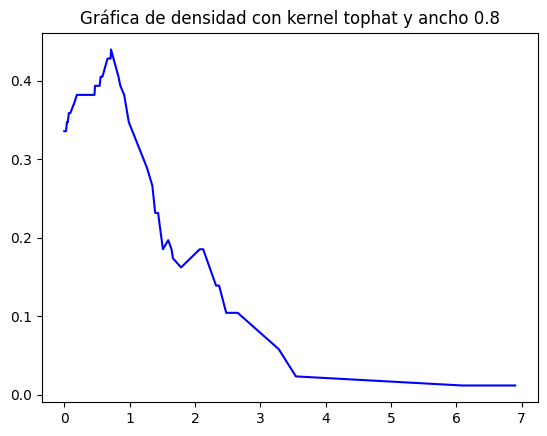

Hora: >13:00


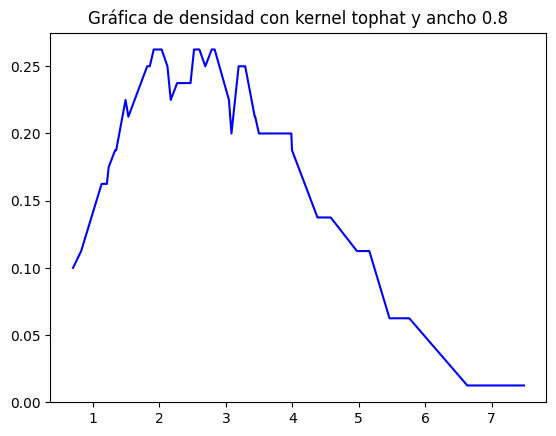

Hora: <=13:00


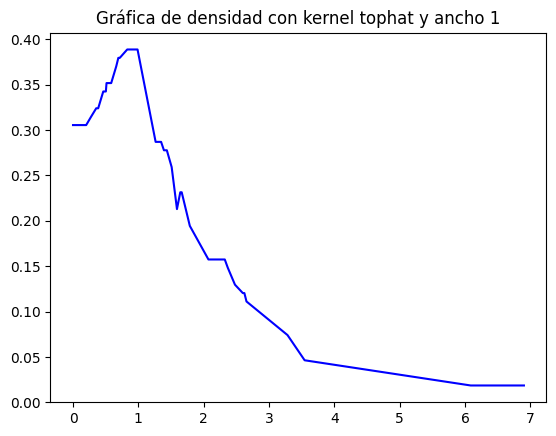

Hora: >13:00


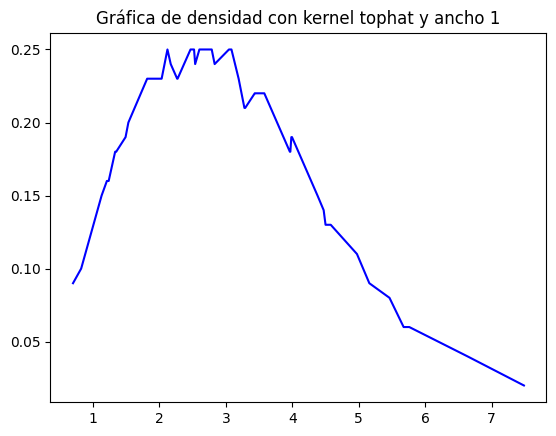

Hora: <=13:00


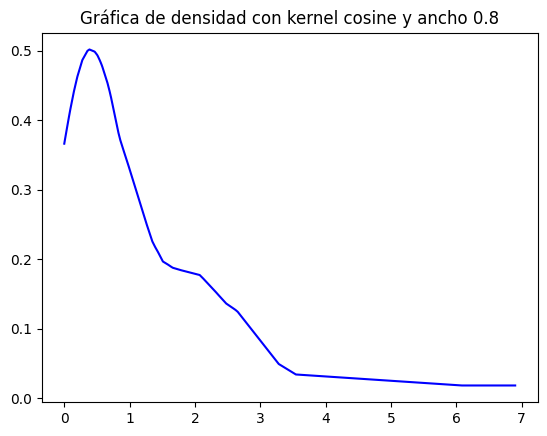

Hora: >13:00


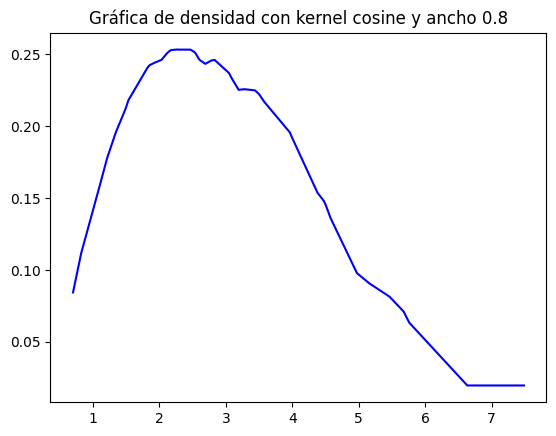

Hora: <=13:00


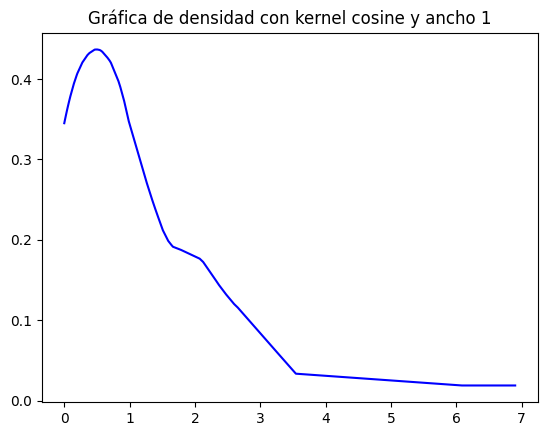

Hora: >13:00


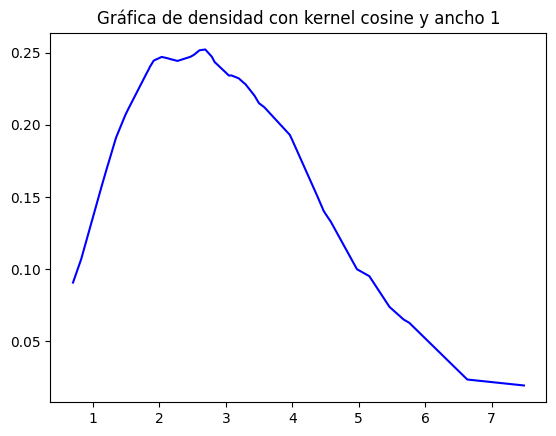

Hora: <=13:00


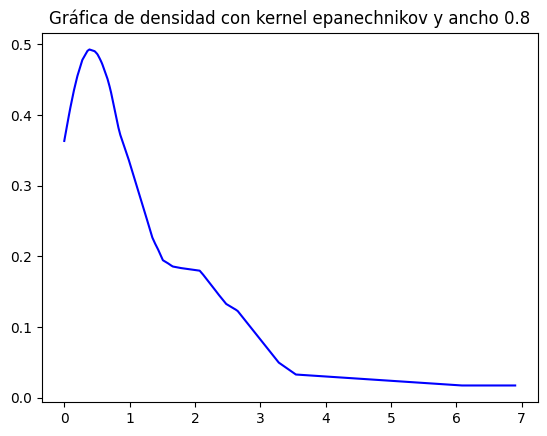

Hora: >13:00


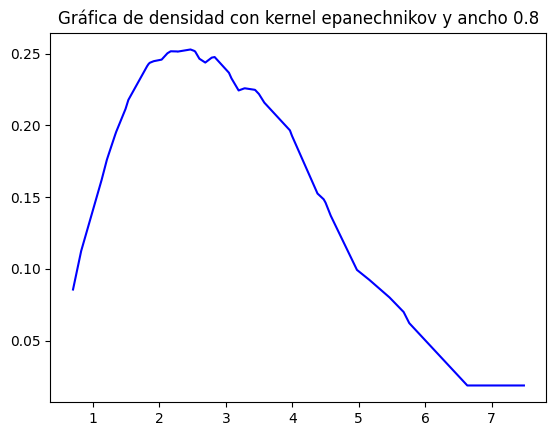

Hora: <=13:00


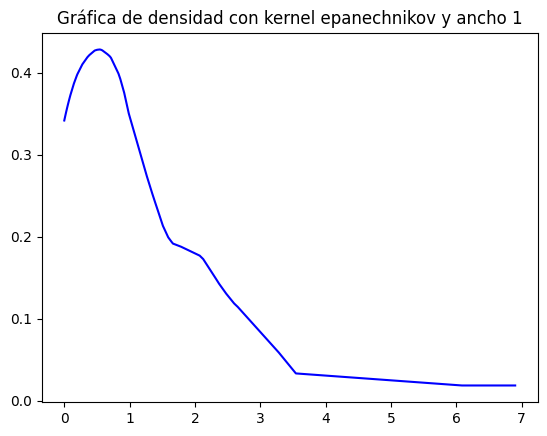

Hora: >13:00


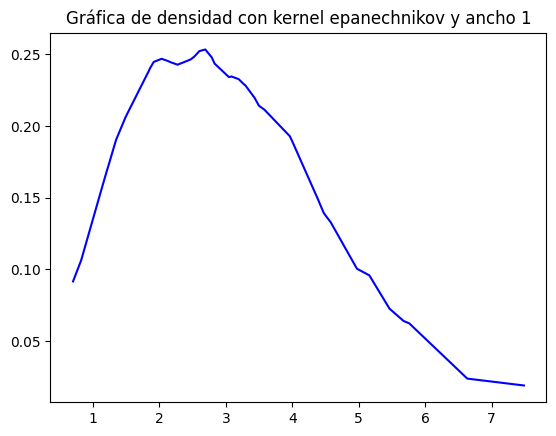

Hora: <=13:00


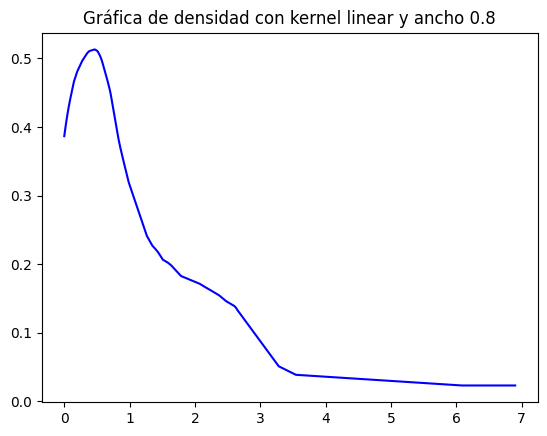

Hora: >13:00


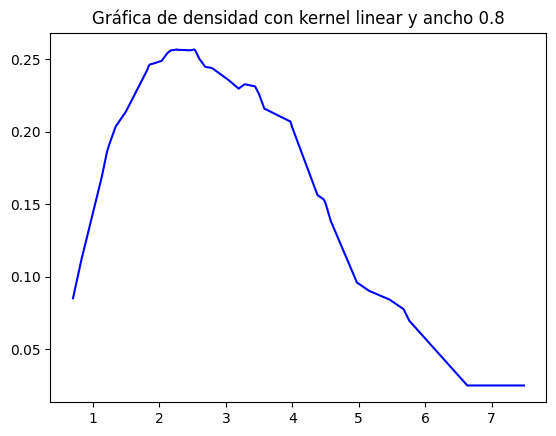

Hora: <=13:00


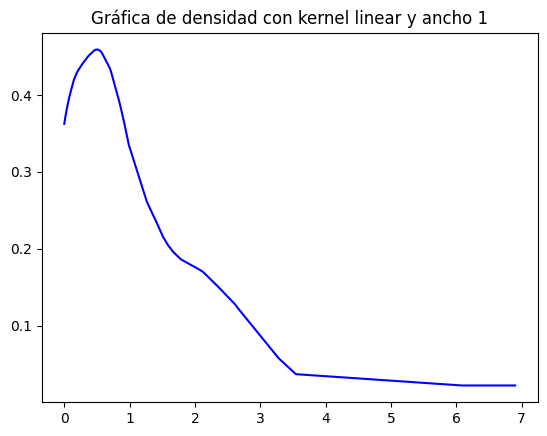

Hora: >13:00


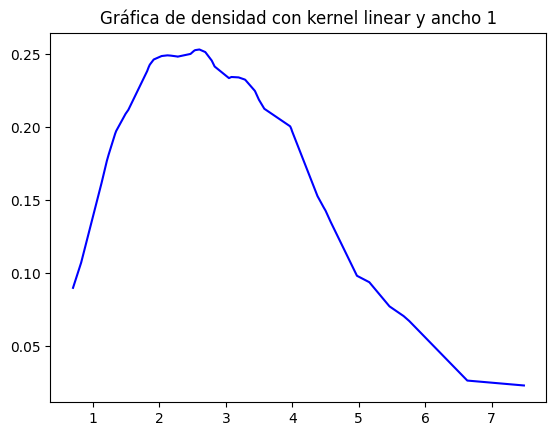

Hora: <=13:00


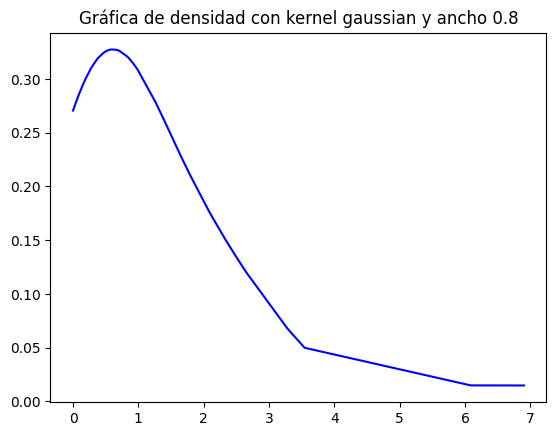

Hora: >13:00


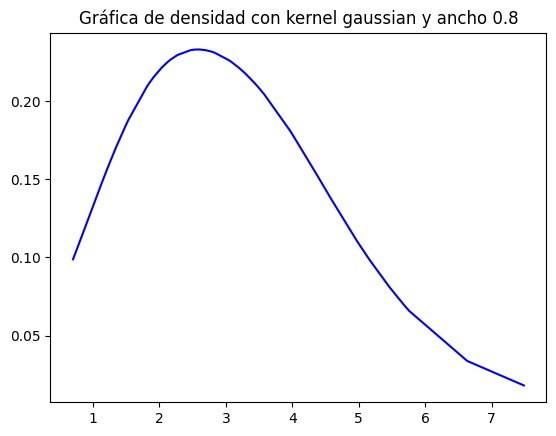

Hora: <=13:00


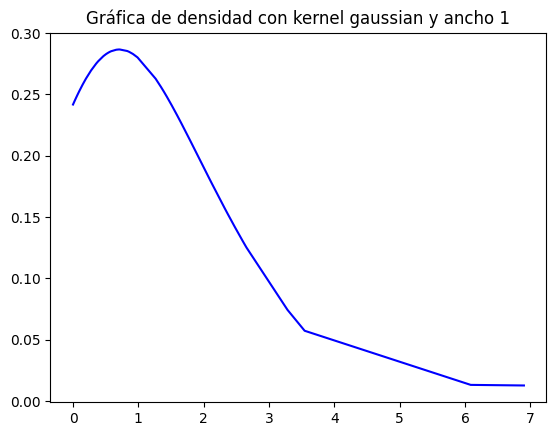

Hora: >13:00


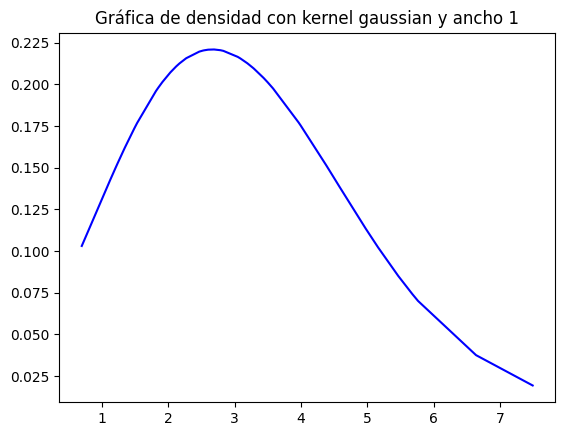

In [154]:
for kernel in ['exponential', 'tophat', 'cosine', 'epanechnikov', 'linear', 'gaussian']:
    for ancho in [0.8,1]:
        for hora in ['<=13:00', '>13:00']:
            print(f'Hora: {hora}')
            PlotKernelDensity(df[df['Hora'] == hora]['PesoTotal'], kernel, ancho)